### Goal of this exploration:
More practice and skill building in visualizing data using python.

### Dataset:
I wanted to focus on exploring data analysis options rather than data cleaning, so I found a dataset that was already clean with no missing values that looked like it could be fun play with. I enjoy weather data (maybe I missed a calling as a meteorologist?), so I chose this [data set](https://github.com/fivethirtyeight/data/tree/master/us-weather-history) from a FiveThirtyEight article titled [What 12 Months of Record-Setting Temperatures looks like across the U.S ](https://fivethirtyeight.com/features/what-12-months-of-record-setting-temperatures-looks-like-across-the-u-s/) 

-------------------------

## Importing packages and data:

In [2]:
# import packages that might be needed for analysis
# I don't understand exactly what "%matplotlib inline" does, 
# but it was suggested in another analysis, so I will leave it for now in case I need it.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import weather data csv files

dfS = pd.read_csv("KSEA.csv") #Seattle
dfP = pd.read_csv("KPHX.csv") #Phoenix
dfI = pd.read_csv("KIND.csv") #Indianapolis
dfC = pd.read_csv("KCLT.csv") #Charlotte
dfLA = pd.read_csv("KCQT.csv") #Los Angeles
dfChi= pd.read_csv("KMDW.csv") #Chicago
dfNY = pd.read_csv("KNYC.csv") #New York
dfH = pd.read_csv("KHOU.csv") #Houston
dfPhi = pd.read_csv("KPHL.csv") #Philadelphia
dfJ = pd.read_csv("KJAX.csv") #Jacksonville

----

## Exploring the data

#### Step 1, figuring out what I have to play with using the Seattle dataset as my test data:
Examining the structure of the datasets:


In [5]:
dfS

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,77,60,94,54,73,45,94,1948,2014,0.00,0.03,0.75
1,2014-7-2,70,58,81,54,73,43,93,1954,2015,0.00,0.03,0.50
2,2014-7-3,64,57,71,54,74,44,92,1954,2015,0.00,0.03,0.47
3,2014-7-4,66,57,75,54,74,43,92,1949,2015,0.00,0.03,0.57
4,2014-7-5,66,56,76,55,74,47,91,1951,1958,0.00,0.03,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,77,64,89,53,72,46,90,1949,2006,0.00,0.03,0.32
361,2015-6-27,78,63,92,53,72,45,92,1949,2015,0.00,0.04,0.61
362,2015-6-28,74,65,83,54,72,45,91,1949,1995,0.01,0.04,0.79
363,2015-6-29,74,63,84,54,73,45,93,1949,1987,0.00,0.03,0.64


In [4]:
dfS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   365 non-null    object 
 1   actual_mean_temp       365 non-null    int64  
 2   actual_min_temp        365 non-null    int64  
 3   actual_max_temp        365 non-null    int64  
 4   average_min_temp       365 non-null    int64  
 5   average_max_temp       365 non-null    int64  
 6   record_min_temp        365 non-null    int64  
 7   record_max_temp        365 non-null    int64  
 8   record_min_temp_year   365 non-null    int64  
 9   record_max_temp_year   365 non-null    int64  
 10  actual_precipitation   365 non-null    float64
 11  average_precipitation  365 non-null    float64
 12  record_precipitation   365 non-null    float64
dtypes: float64(3), int64(9), object(1)
memory usage: 37.2+ KB


In [10]:
date_range = dfS['date']
date_range

0       2014-7-1
1       2014-7-2
2       2014-7-3
3       2014-7-4
4       2014-7-5
         ...    
360    2015-6-26
361    2015-6-27
362    2015-6-28
363    2015-6-29
364    2015-6-30
Name: date, Length: 365, dtype: object

Looks like I've got lots of quantitative data, and the data run from July 1, 2014 to June 20, 2015

----

## Question 1: The range of the temperatures in a location may vary, but where do the bulk of the year's temperatures lie? 
(i.e. If you live here, what will most of your days temperatures look like?)

To figure this out, I counted the frequency of each mean temperature and graphed it in a histogram for each location. For example, here is Los Angeles:

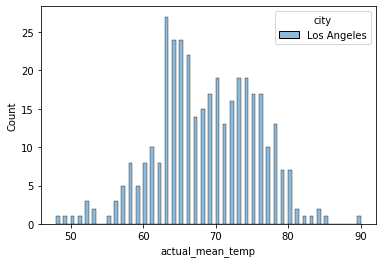

In [14]:
y = dfLA[['actual_mean_temp']].assign(city='Los Angeles')
ax = sns.histplot(data=y, x='actual_mean_temp', hue='city', binwidth=.5)

And Houston:

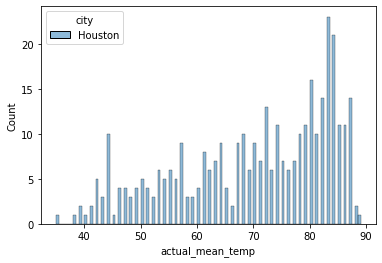

In [13]:
y = dfH[['actual_mean_temp']].assign(city='Houston')
ax = sns.histplot(data=y, x='actual_mean_temp', hue='city', binwidth=.5)

The count of average temperatures in L.A. have a somewhat bell-shaped curve with a relatively small range, while temps in Houston are skewed left over a wider range. I had always thought of Los Angelos as a hot city, but those mean temperatures for L.A. look pretty fantastic.  

### Additional stuff I'd like to work on here: 

Make one visual with a bunch of panels, with each panel being mean temperatures in an individual city, and adjust the x-axis temperature range on each panel to be the same, to allow for easier visualization of city differences. 

---------------------------------------------------------------------------

## Question 2: How do mean temperatures compare between cities?

Looking at individual cities is great, but I wanted to be able to directly compare two cities on the same histogram. After several hours of searching and lots of testing code, I still could not get two cities onto one graph in a way that was visually useful. So I turned to the crowd at stackoverflow, who solved [my question](https://stackoverflow.com/questions/67753461/how-do-i-plot-weather-data-from-two-data-sets-on-one-bar-graph-using-python/67755029#67755029) within a couple of hours. Whoever created that site deserves a medal with "You made the world a better place, and developers everywhere thank you!" engraved on it.

Here's how they suggested I make the histogram:

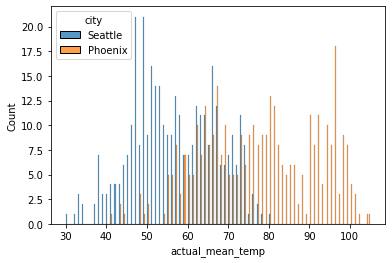

In [15]:
z = pd.concat([
    dfS[['actual_mean_temp']].assign(city='Seattle'),
    dfP[['actual_mean_temp']].assign(city='Phoenix'),
])

ax = sns.histplot(data=z, x='actual_mean_temp', hue ='city',
                   multiple='dodge', binwidth=.5)

### Additional stuff I'd like to work on here: 

Similar to the additional work on single cities, I'd like to make one visual with panels comparing each city with every other.

I suppose I could run some t-tests on the comparison of the mean temps just to quantify the similarity/difference between the two cities.

-------

## Next steps:
- Included in the data is the hottest year on record for each day. I'd like to graph the frequency of each year in the record data, and then see if there is a correlation between year and hottest record for each location. 

Something kind of like this, but with different x-axis label, and maybe as a scatterplot:  

<AxesSubplot:>

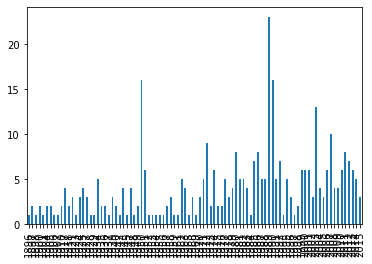

In [7]:
dfP["record_max_temp_year"].value_counts(sort = False).plot(kind='bar')

- ^ That analysis would be more interesting with the most recent data, so I'd like to scraping the weather website to get updated data to analyze.
- In addition to looking at the most recent data, I'd like to scrape the weather data of the airport closest to my home, and see how it compares to some of the other cities. Comparing precipitation levels could be fun too. 